In [62]:
from scipy.stats import t
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from typing import List
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans


In [63]:
def obter_intervalo_confianca(dataframe: pd.DataFrame):    
    conf_level = 0.95
    media = dataframe['preco'].mean()
    std = dataframe['preco'].std()
    n = dataframe.shape[0]
    grausLiberdade = n - 1
    t_value = t.ppf((1 + conf_level) / 2, grausLiberdade)
    inf = media - t_value * std / np.sqrt(n)
    sup = media + t_value * std / np.sqrt(n)
    print('Média:', round(media), ' Desvio padrão:', round(std))
    print('Intervalo de confiança:', round(inf), '-', round(sup))

In [64]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None) -> pd.DataFrame:
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa.parquet')
    base_original = base_original.query(query)
    return base_original

In [65]:
def obter_estatistica(bairros: List[str], base_original_completa: pd.DataFrame) -> pd.DataFrame:
    lista_dados = []
    for bairro in bairros:
        dados_temp = base_original_completa.query(
            f'bairro_teste == "{bairro}"')
        lista_dados.append(
            {
                'bairro': bairro,
                'media_preco':  round(dados_temp['preco'].mean(), 2),
                'mediana_preco':  round(dados_temp['preco'].median(), 2),
                'moda': round(dados_temp['preco'].mode()[0], 2),
                'desvio_padrao': round(dados_temp['preco'].std(), 2),
                'total_imoveis': dados_temp.shape[0],
                'coeficiente_variacao': (round(dados_temp['preco'].std(), 2) / round(dados_temp['preco'].mean(), 2)) * 100
            }
        )
    df = pd.DataFrame(lista_dados)
    return df
  

In [66]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original['quarto'] = base_original['quarto'].str.replace('1 Quarto', '1').astype('int32')
base_original['garagem'] = base_original['garagem'].str.replace('--', '0').astype('int32')
base_original['metragem'] = base_original['metragem'].astype('int32')
base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


In [67]:
base_original = base_original.drop_duplicates()
base_original.shape

(8395, 9)

- Total Imoveis

In [68]:
base_original.groupby('bairro_teste').size().reset_index(name='count').sort_values(by='count', ascending=False).nlargest(50, 'count')


,bairro_teste,count
34,Jardim Botânico,739
9,Centro,736
98,Nova Aliança,661
51,Jardim Irajá,353
74,Jardim Paulista,315
137,Ribeirânia,235
8,Campos Eliseos,178
73,Jardim Palma Travassos,175
69,Jardim Olhos D Agua,172
29,Ipiranga,166


In [69]:
bairros = [
    'Jardim Botânico',
    'Centro',
    'Nova Aliança',
    'Jardim Irajá',
    'Sumarezinho', 
    'Vila Monte Alegre', 
    'Bonfim Paulista',
    'Ribeirânia',
    'Campos Eliseos'
]
base_bairros = base_original[base_original['bairro_teste'].isin(bairros)]

In [70]:
base_bairros.pivot_table(index='garagem', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
garagem,,,,,,,,,
0,3,9,91,11,6,8,0,3,0
1,75,148,434,227,152,317,193,109,67
2,46,21,169,389,142,291,30,5,8
3,9,0,27,72,35,40,0,0,2
4,5,0,15,28,15,5,12,1,0
5,0,0,0,5,2,0,0,0,0
6,1,0,0,6,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1


In [71]:
base_bairros.pivot_table(index='quarto', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
quarto,,,,,,,,,
1,6,3,103,111,35,186,66,0,21
2,92,83,165,254,85,236,140,104,44
3,40,90,402,328,206,229,26,13,12
4,1,1,64,46,26,10,3,1,0
5,2,1,2,0,1,0,0,0,0
20,0,0,0,0,0,0,0,0,1


In [72]:
base_banheiro = base_bairros.pivot_table(index='banheiro', columns='bairro_teste', aggfunc='size', fill_value=0).sort_index().reset_index()
base_banheiro

bairro_teste,banheiro,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
0,1,69,97,164,151,64,245,131,72,40
1,2,31,56,208,251,126,166,80,45,36
2,3,9,24,226,107,78,137,8,1,1
3,4,21,0,75,89,42,55,5,0,0
4,5,7,1,54,119,35,52,6,0,0
5,6,3,0,5,13,6,3,4,0,0
6,7,0,0,2,5,1,2,1,0,0
7,8,1,0,0,0,0,1,0,0,0
8,9,0,0,2,2,1,0,0,0,0
9,12,0,0,0,1,0,0,0,0,0


# intervalo de confiança

In [100]:

base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()
dados_estatisticos = []
for bairro in bairros:
    amostras = {}
    base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
    amostras['bairro'] = bairro
    amostras['total_imoveis'] = base_temp.shape[0]
    amostras['media'] = round(base_temp["preco"].mean(), 2)
    amostras['max_preco'] = round(base_temp["preco"].max(), 2)
    amostras['min_preco'] = round(base_temp["preco"].min(), 2)
    amostras['mediana'] = round(base_temp["preco"].median(), 2)
    amostras['moda'] = round(base_temp["preco"].mode()[0], 2)
    amostras['desvio_padrao'] = round(base_temp["preco"].std(), 2)
    amostras['erro_padrao'] = round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0])
    amostras['graus_liberdade'] = base_temp.shape[0] - 1
    amostras['ic_limite_inferior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[0]
    amostras['ic_limite_superior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[1]
    dados_estatisticos.append(amostras)
base_dados_bairros_selecionados = pd.DataFrame(dados_estatisticos)
base_dados_bairros_selecionados[['bairro','ic_limite_inferior', 'ic_limite_superior']]


/tmp/ipykernel_46930/2268844504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()


,bairro,ic_limite_inferior,ic_limite_superior
0,Jardim Botânico,692406.69,796372.09
1,Centro,385941.16,418212.30
2,Nova Aliança,495680.21,541496.19
3,Jardim Irajá,563291.94,637354.86
4,Sumarezinho,232354.55,258694.77
5,Vila Monte Alegre,223481.83,341333.59
6,Bonfim Paulista,438829.54,739710.46
7,Ribeirânia,386517.85,487600.09
8,Campos Eliseos,253594.17,284126.05


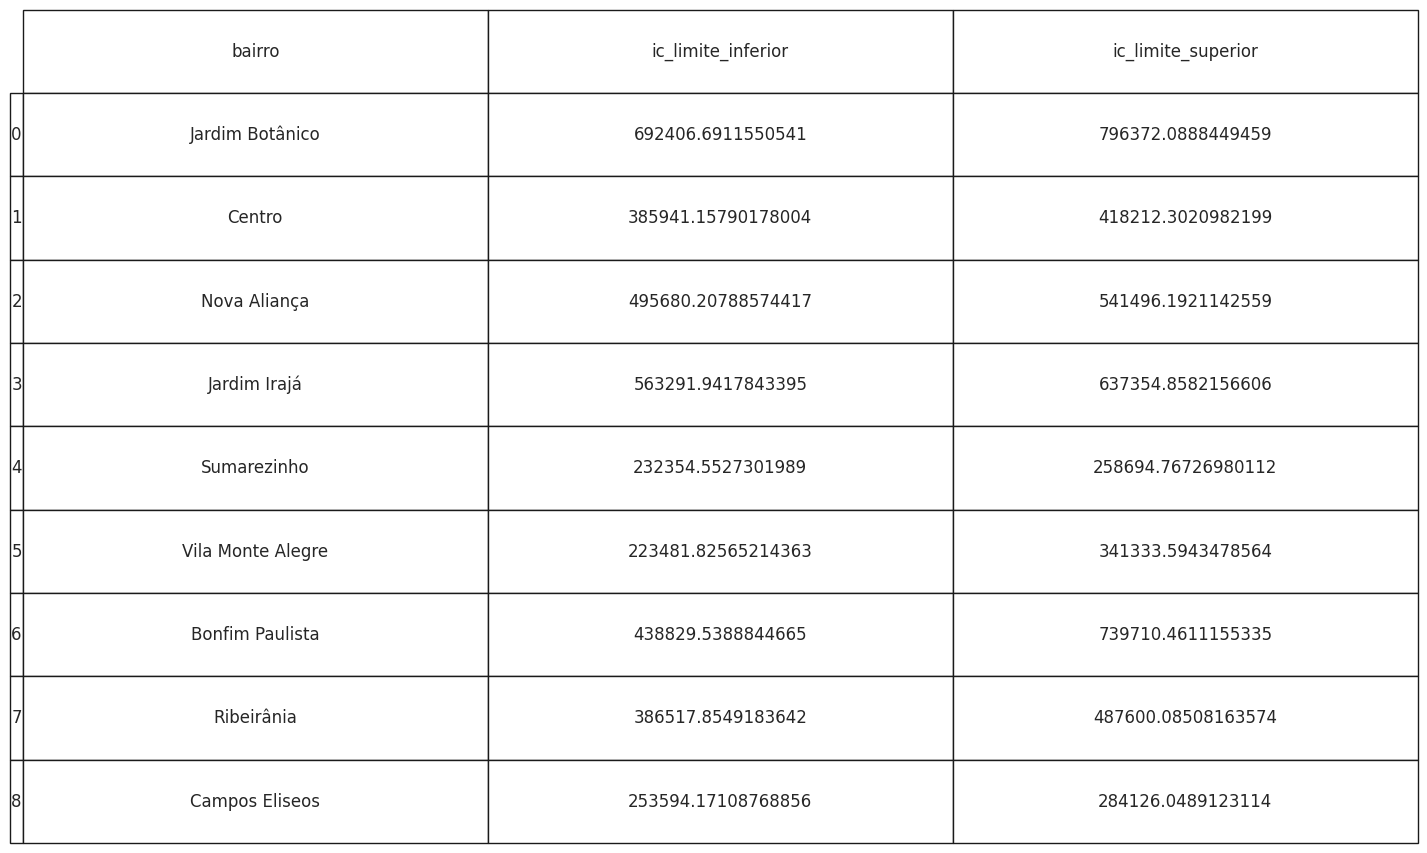

In [105]:
from pandas.plotting import table
fig, ax = plt.subplots(figsize=(6, 3))  # Ajuste o tamanho conforme necessário

# Remover eixos
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
df =  base_dados_bairros_selecionados[['bairro','ic_limite_inferior', 'ic_limite_superior']]
# Adicionar a tabela à figura
tabela = table(ax,df , loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Ajustar o layout
tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(5, 5)  # Ajuste a escala conforme necessário

# Salvar a figura como imagem
plt.savefig('../fig/tabela.png', bbox_inches='tight')
plt.show()

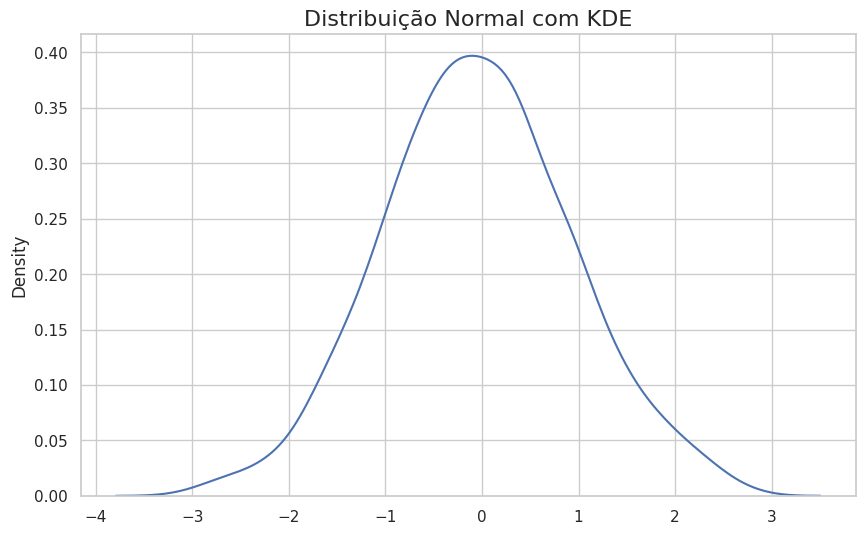

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados de uma distribuição normal
np.random.seed(0)  # Para reprodutibilidade
dados = np.random.normal(loc=0, scale=1, size=1000)

# Criar o gráfico de distribuição
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(dados)
# Adicionar título
plt.title('Distribuição Normal com KDE', fontsize=16)

# Mostrar o gráfico
plt.show()

# Gráficos para mostrar média, moda, mediana, desvio padrão

/tmp/ipykernel_46930/597860902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()


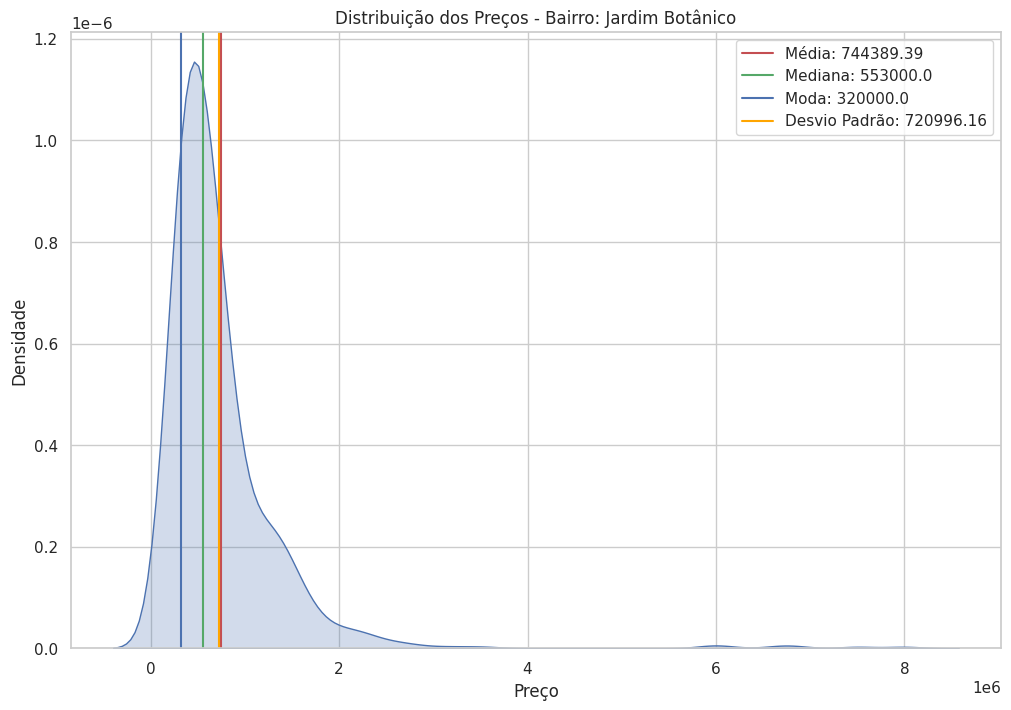

Bairro: Jardim Botânico
Média: 744389.39
Mediana: 553000.0
Moda: 320000.0
Desvio Padrão: 720996.16
---------------------------


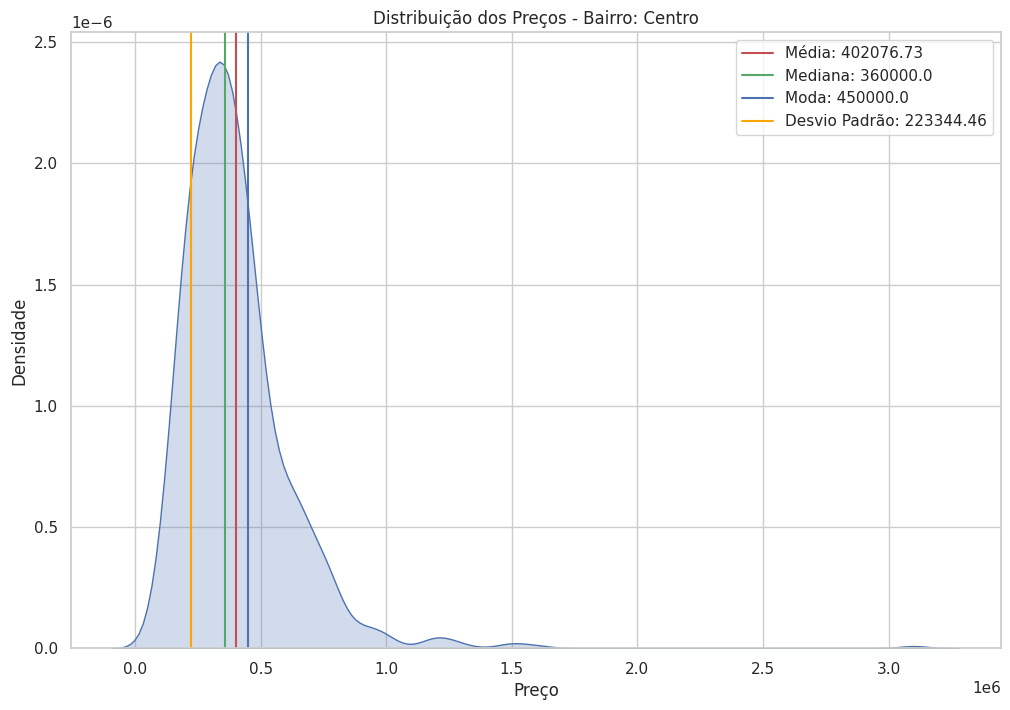

Bairro: Centro
Média: 402076.73
Mediana: 360000.0
Moda: 450000.0
Desvio Padrão: 223344.46
---------------------------


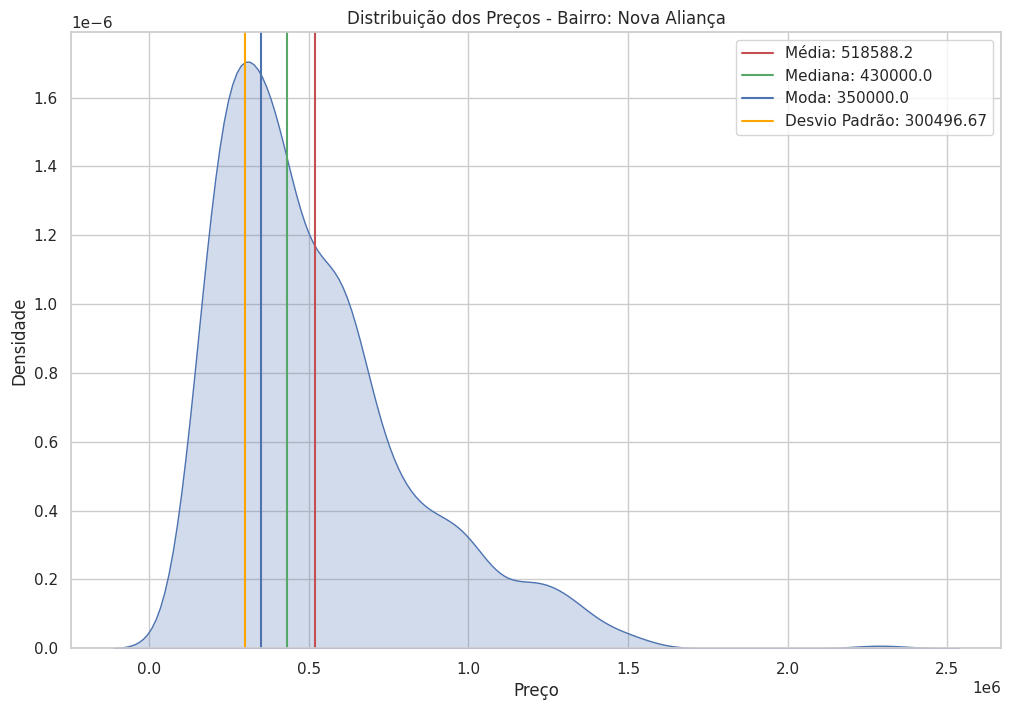

Bairro: Nova Aliança
Média: 518588.2
Mediana: 430000.0
Moda: 350000.0
Desvio Padrão: 300496.67
---------------------------


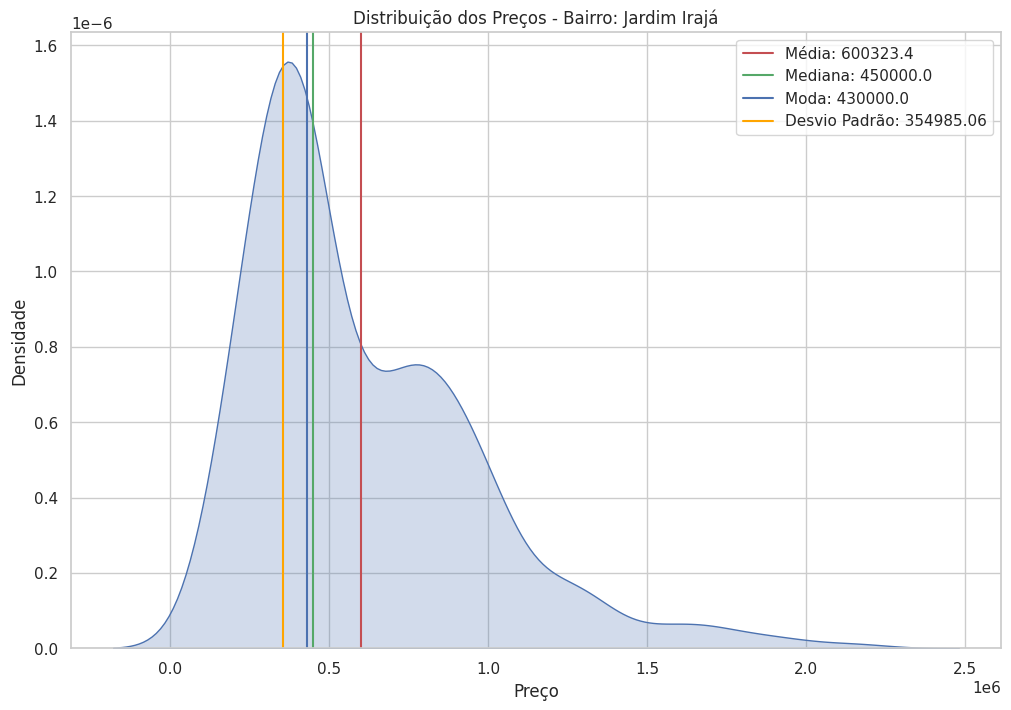

Bairro: Jardim Irajá
Média: 600323.4
Mediana: 450000.0
Moda: 430000.0
Desvio Padrão: 354985.06
---------------------------


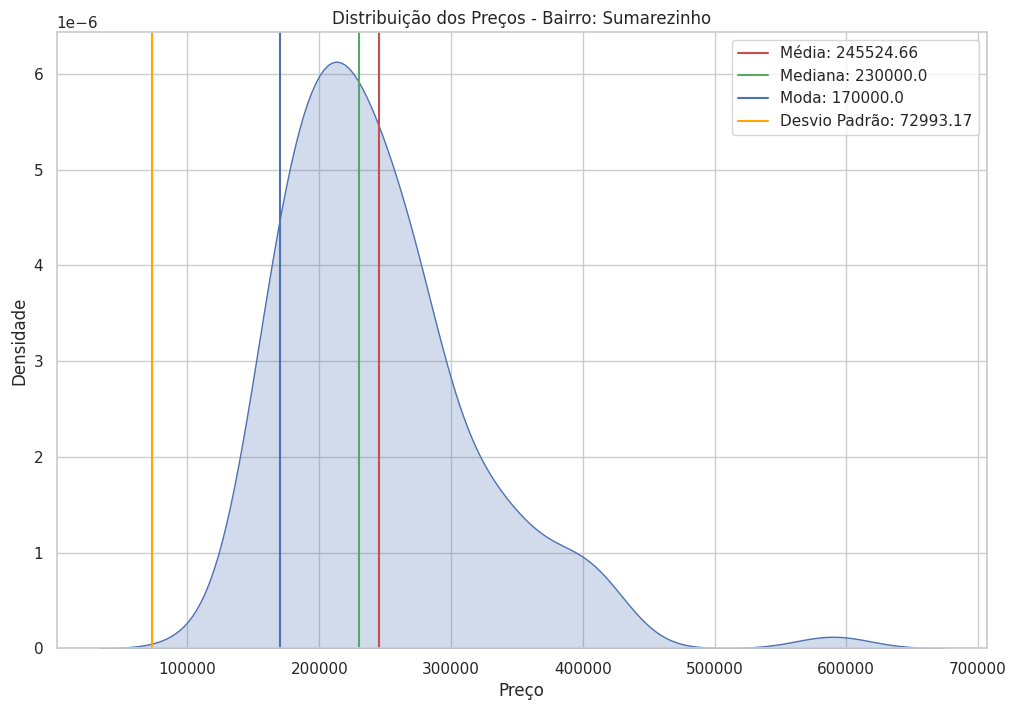

Bairro: Sumarezinho
Média: 245524.66
Mediana: 230000.0
Moda: 170000.0
Desvio Padrão: 72993.17
---------------------------


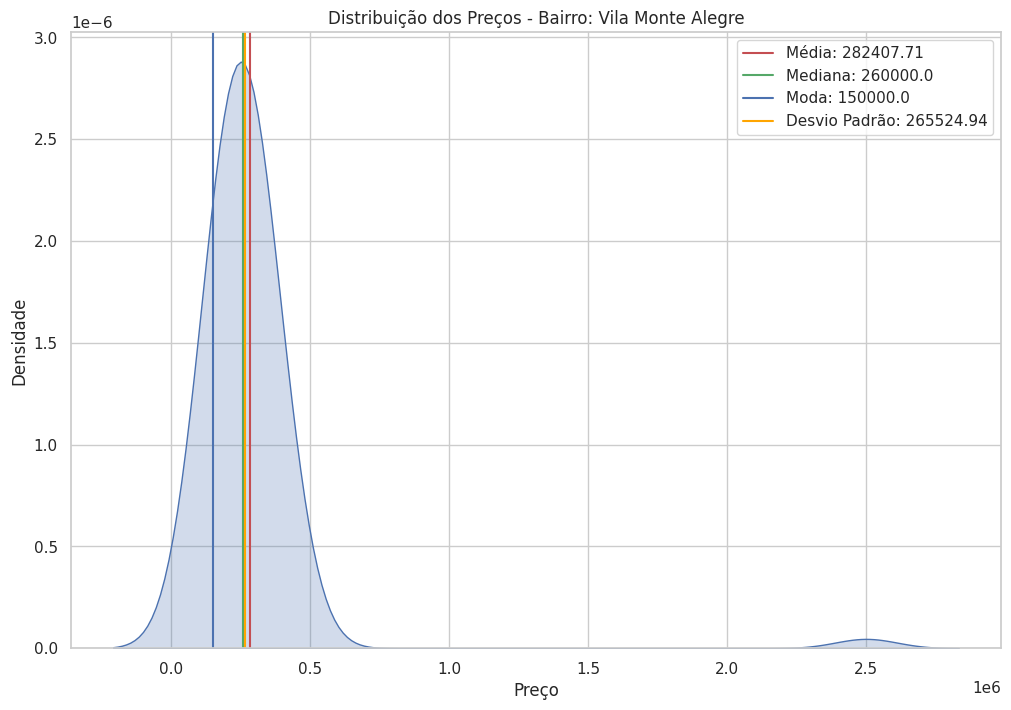

Bairro: Vila Monte Alegre
Média: 282407.71
Mediana: 260000.0
Moda: 150000.0
Desvio Padrão: 265524.94
---------------------------


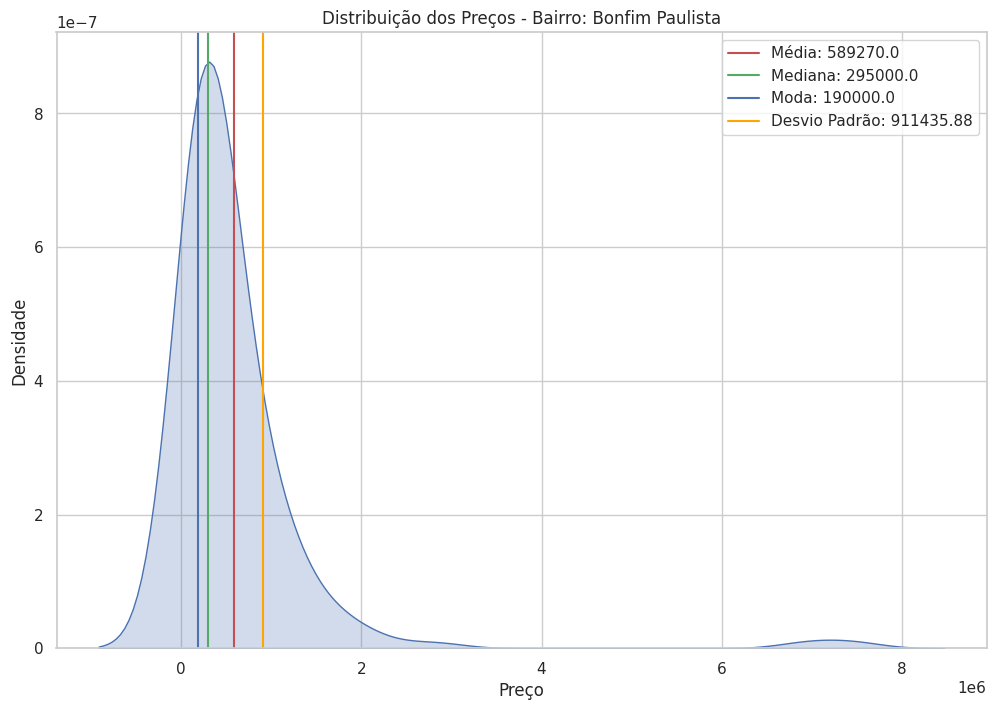

Bairro: Bonfim Paulista
Média: 589270.0
Mediana: 295000.0
Moda: 190000.0
Desvio Padrão: 911435.88
---------------------------


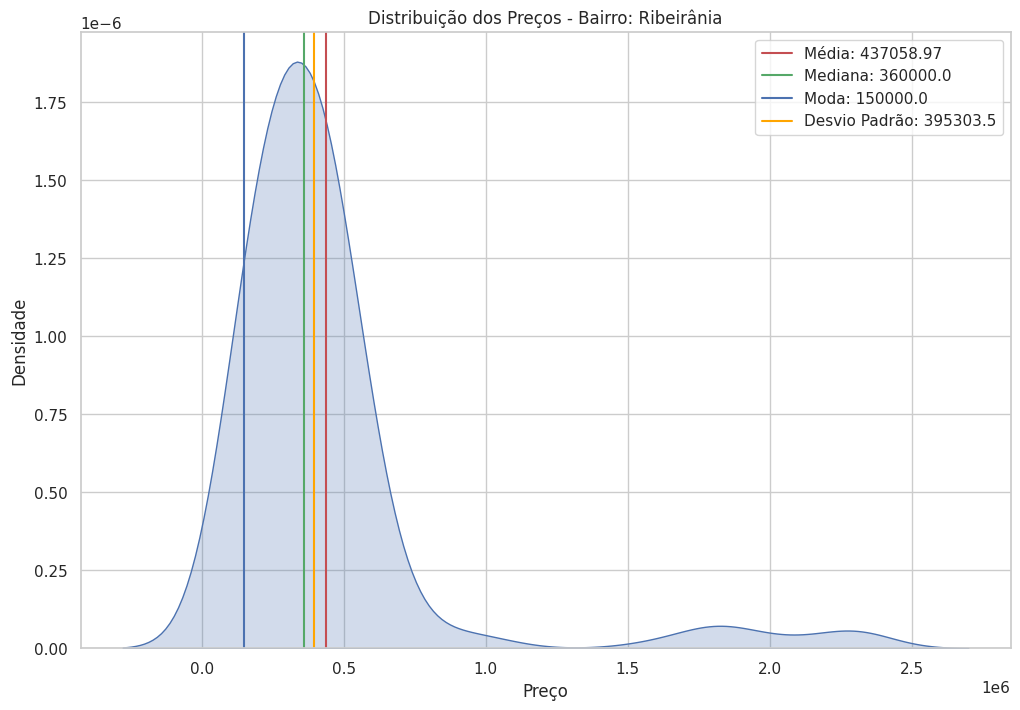

Bairro: Ribeirânia
Média: 437058.97
Mediana: 360000.0
Moda: 150000.0
Desvio Padrão: 395303.5
---------------------------


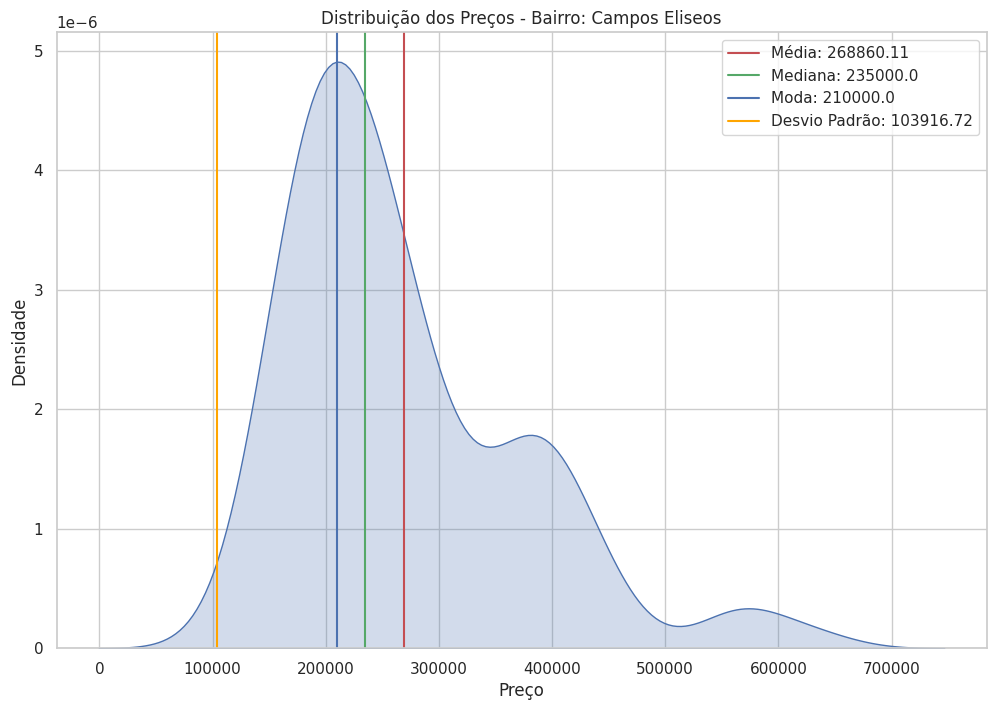

Bairro: Campos Eliseos
Média: 268860.11
Mediana: 235000.0
Moda: 210000.0
Desvio Padrão: 103916.72
---------------------------


In [98]:
base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()
dados_estatisticos = []
for bairro in bairros:

    base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
    

    media = round(base_temp["preco"].mean(), 2)
    mediana = round(base_temp["preco"].median(), 2)
    moda = round(base_temp["preco"].mode()[0], 2)
    desvio_padrao = round(base_temp["preco"].std(), 2)
    

    plt.figure(figsize=(12, 8))
    sns.kdeplot(base_temp["preco"], fill=True)
    plt.title(f'Distribuição dos Preços - Bairro: {bairro}')
    plt.xlabel('Preço')
    plt.ylabel('Densidade')
    plt.savefig(f'../fig/{bairro}.png')
    

    plt.axvline(media, color='r', linestyle='-', label=f'Média: {media}')
    plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana: {mediana}')
    plt.axvline(moda, color='b', linestyle='-', label=f'Moda: {moda}')
    plt.axvline(desvio_padrao, color='orange', linestyle='-', label=f'Desvio Padrão: {desvio_padrao}')

   

    plt.legend()
    

    plt.show()


    print(f'Bairro: {bairro}')
    print(f'Média: {media}')
    print(f'Mediana: {mediana}')
    print(f'Moda: {moda}')
    print(f'Desvio Padrão: {desvio_padrao}')
    print('---------------------------')



# Teste de hipóteses

- Verificar se os preços dos apartamentos de até 60 m2 são maiores que os apartamentos  de 60 metros

In [13]:
significancia = 0.05
confianca = 1 - significancia

In [39]:
bairros = [
    ('Jardim Botânico', 100), 
    ('Centro', 80), 
    ('Nova Aliança', 100), 
    ('Jardim Irajá', 35), 
    ('Sumarezinho', 50), 
    ('Vila Monte Alegre', 33), 
    ('Bonfim Paulista', 60),
    ('Ribeirânia', 60),
    ('Campos Eliseos', 80)
    
]
metro = 60
for bairro in bairros:
    try:
        print('*' * 20, bairro[0], '*' * 20)
        base_temp = base_bairros.query(f'bairro_teste == "{ bairro[0]}"')
        print(base_temp.shape)
        base_menor_area = base_temp.query(f'metragem < {metro}').sample(n=bairro[1], random_state=101).preco
        base_maior_area = base_temp.query(f'metragem >= {metro}').sample(n=bairro[1], random_state=101).preco
        test_menor_area = DescrStatsW(base_menor_area)
        test_maior_area = DescrStatsW(base_maior_area)
        test_preco = test_menor_area.get_compare(test_maior_area)
        z, p_value = test_preco.ztest_ind(alternative='larger', value=0)
        if p_value < significancia:
            print(f'Rejeitamos a hipótese nula: os preços dos apartamentos de até {metro} m² são significativamente maiores.')
        else:
            print(f'Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até {metro} m² são maiores.')
    except Exception as e:
        print(bairro)
    print()


******************** Jardim Botânico ********************
(871, 9)
Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Centro ********************
(872, 9)
Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Nova Aliança ********************
(805, 9)
Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Jardim Irajá ********************
(414, 9)
Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Sumarezinho ********************
(139, 9)
Aceitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Vila Monte Alegre *****

- Quartos

In [42]:
bairros =[ 
    ('Bonfim Paulista', 40),
    ('Campos Eliseos', 60),
    ('Centro', 100),
    ('Jardim Botânico', 100),
    ('Jardim Irajá', 80),
    ('Nova Aliança', 100),
    ('Ribeirânia', 26)
]
for bairro in bairros:
    print('*' * 20, bairro[0], '*' * 20)
    base_temp = base_bairros.query(f'bairro_teste == "{bairro[0]}"')
    base_tres_quartos = base_temp.query(f' quarto == 3')
    base_dois_quartos = base_temp.query(f' quarto in [1, 2]')
    print(f'base_tres_quartos.shape:  {base_tres_quartos.shape} base_dois_quartos.shape {base_dois_quartos.shape}')
    base_tres_quartos = base_tres_quartos.sample(n=bairro[1], random_state=101).preco
    base_dois_quartos = base_dois_quartos.sample(n=bairro[1], random_state=101).preco
    teste_tres_quartos = DescrStatsW(base_tres_quartos)
    teste_dois_quartos = DescrStatsW(base_dois_quartos)
    teste = teste_tres_quartos.get_compare(teste_dois_quartos)
    if bairro[1] >= 30:
        valor_teste, p_valor = test_preco.ztest_ind(alternative='larger', value=0)
        if p_valor < significancia:
            print('Rejeitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos')
        else:
            print('Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos ')
    else:
        valor_teste, p_valor, df= test_preco.ttest_ind(alternative='larger', value=0)
        if p_valor < significancia:
            print('Rejeitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos')
        else:
            print('Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos ')

        

******************** Bonfim Paulista ********************
base_tres_quartos.shape:  (44, 9) base_dois_quartos.shape (118, 9)
Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos 
******************** Campos Eliseos ********************
base_tres_quartos.shape:  (113, 9) base_dois_quartos.shape (93, 9)
Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos 
******************** Centro ********************
base_tres_quartos.shape:  (473, 9) base_dois_quartos.shape (320, 9)
Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos 
******************** Jardim Botânico ********************
base_tres_quartos.shape:  (394, 9) base_dois_quartos.shape (423, 9)
Aceitamos que o preço de apartamentos de três quarto é maior que os apartamentos de 1 e 2 quartos 
******************** Jardim Irajá ********************
base_tres_quartos.shape:  (240, 9) base_dois_quartos.shap

- Testar se o preço os imóveis com dois banheiros é maior que dos imóveis com um banheiro

In [28]:
base_bairros.columns

Index(['tipo_imovel', 'nome', 'preco', 'metragem', 'quarto', 'banheiro',
       'garagem', 'ID_CASA', 'bairro_teste'],
      dtype='object')

In [35]:
bairros =[ 
    ('Bonfim Paulista', 35),
    ('Campos Eliseos', 50),
    ('Centro', 100),
    ('Jardim Botânico', 100),
    ('Jardim Irajá', 50),
    ('Nova Aliança', 100),
    ('Ribeirânia', 26)
]
for bairro in bairros:
    print('*' * 20, bairro[0], '*' * 20)
    base_temp = base_bairros.query(f'bairro_teste == "{bairro[0]}"')
    base_dois_banheiros = base_temp.query(f' banheiro == 2').sample(n=bairro[1], random_state=101).preco
    base_um_banheiro = base_temp.query(f' banheiro == 1').sample(n=bairro[1], random_state=101).preco
    teste_dois_banheiros = DescrStatsW(base_dois_banheiros)
    teste_um_banheiro = DescrStatsW(base_um_banheiro)
    teste = teste_dois_quartos.get_compare(teste_um_banheiro)
    if bairro[1] >= 30:
        valor_teste, p_valor = test_preco.ztest_ind(alternative='larger', value=0)
        if p_valor < significancia:
            print('Rejeitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro')
        else:
            print('Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro')
    else:
        valor_teste, p_valor, df= test_preco.ttest_ind(alternative='larger', value=0)
        if p_valor < significancia:
            print('Rejeitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro')
        else:
            print('Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro')



******************** Bonfim Paulista ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Campos Eliseos ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Centro ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Jardim Botânico ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Jardim Irajá ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Nova Aliança ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro
******************** Ribeirânia ********************
Aceitamos que o preço de apartamentos de 2 banheiros e maior que um banheiro


- Preços entre bairros

In [50]:
base_bairros

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
9,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2694181987,Jardim Botânico
14,Apartamento,"Apartamento com 2 Quartos à Venda, 84m²",298000.00,84,2,2,1,2586310967,Vila Monte Alegre
...,...,...,...,...,...,...,...,...,...
9962,Apartamento,"Apartamento com Quarto à Venda, 10m²",104652.00,10,1,1,1,2697866085,Bonfim Paulista
9965,Apartamento,"Apartamento com 3 Quartos à Venda, 128m²",400000.00,128,3,3,1,2629905962,Centro
9966,Apartamento,"Apartamento com 4 Quartos à Venda, 280m²",780000.00,280,4,5,3,2669521674,Centro
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro


In [55]:
bairro_um = 'Sumarezinho'
bairro_dois = 'Vila Monte Alegre'
base_bairro_sumarezinho = base_bairros.query(f' bairro_teste == "{bairro_um}"').sample(n=70, random_state=101).preco
base_bairro_vila_amelia = base_bairros.query(f' bairro_teste == "{bairro_dois}"').sample(n=70, random_state=101).preco
base_bairro_sumarezinho.shape, base_bairro_vila_amelia.shape
teste_bairro_sumarezinho = DescrStatsW(base_bairro_sumarezinho)
teste_bairro_vila_monte_alegre = DescrStatsW(base_bairro_vila_amelia)
teste_preco = teste_bairro_sumarezinho.get_compare(teste_bairro_vila_monte_alegre)
valor_teste, p_valor = teste_preco.ztest_ind(alternative='larger')
if p_valor < significancia  :
    print('Reijeitamos a hipótese nula, ou seja: os preços dos imóveis do bairro Sumarezinho maior em relaçao ao  bairro da Vila Monte Alegre')
else:
    print('Aceitamos a Hipótese Nula, ou seja: os preços dos imóveis do bairro Sumarezinho é menor ou igual em relaçao ao  bairro da Vila Monte Alegre')


Aceitamos a Hipótese Nula, ou seja: os preços dos imóveis do bairro Sumarezinho é menor ou igual em relaçao ao  bairro da Vila Monte Alegre


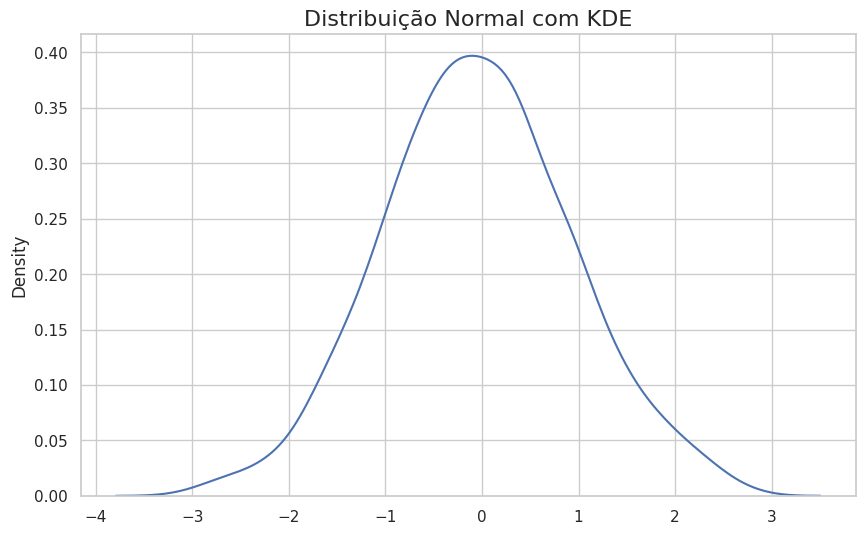